# Body time prediction

In [ ]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
gene_expression=pd.read_csv('Moller_Normalized_gene_expression.csv')
x=gene_expression.drop('Samples', axis=1)

In [3]:
DLMO25=pd.read_csv('Moller_DLMO25_data.csv')
DLMO25_angle=((DLMO25.drop('sample', axis=1))%24)*2*np.pi/24
y1=np.sin(DLMO25_angle['hrs_after_DLMO25'])
y2=np.cos(DLMO25_angle['hrs_after_DLMO25'])
y=pd.concat([y1, y2], axis=1, keys=['y1','y2'])


In [4]:
x_train, x_test, y_train, y_test =train_test_split(x,y,random_state=999)
enet=ElasticNet(alpha=0.1, l1_ratio=0.5)
enet.fit(x_train,y_train)

ElasticNet(alpha=0.1)

In [37]:
ceff_mat=pd.DataFrame(enet.coef_, columns=x.columns)
df=ceff_mat

In [72]:
y_pred=enet.predict(x_test)
Pred_Time=(np.arctan2(y_pred[:,0], y_pred[:,1])%(2*np.pi))*(24/(2*np.pi)) # convert back angle to time
y_test_Time=(np.arctan2(y_test['y1'], y_test['y2'])%(2*np.pi))*(24/(2*np.pi))

rms=np.sqrt(mean_squared_error(y_test_Time,Pred_Time))

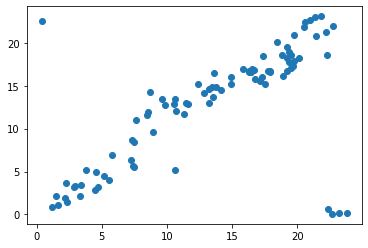

In [68]:
import matplotlib.pyplot as plt
plt.scatter(y_test_Time, Pred_Time)